#ML4Net - Lab 1

## Team members

Joel López (268823)| Julen Legido (268309) | Adrià Porta (268513) | Noel Pedrosa (269012)

## Description

In this lab, you are going to get introduced into Multi-Armed Bandits (MABs) and Wi-Fi simulations. More specifically, you are going to implement a MAB algorithm that performs channel allocation in an Overlapping Basic Service Set (OBSS), i.e., in a scenario where multiple independent BSSs coexist.

## Instructions

*   Follow the steps from this Notebook and complete the proposed exercises.
*   Deliver the completed Notebook by uploading it to your Github repository.
*   Submission deadline: 18 May 2025 (EoB).

## Setting up the environment

1. Connect your Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Download the Simulator's source code

In [2]:
!wget https://github.com/fwilhelmi/fwilhelmi.github.io/raw/refs/heads/master/files/Komondor-lightweight.zip

--2025-05-18 14:56:42--  https://github.com/fwilhelmi/fwilhelmi.github.io/raw/refs/heads/master/files/Komondor-lightweight.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fwilhelmi/fwilhelmi.github.io/refs/heads/master/files/Komondor-lightweight.zip [following]
--2025-05-18 14:56:43--  https://raw.githubusercontent.com/fwilhelmi/fwilhelmi.github.io/refs/heads/master/files/Komondor-lightweight.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 979661 (957K) [application/zip]
Saving to: ‘Komondor-lightweight.zip’

Komondor-lightweigh 100%[===================>] 956.70K  --.-KB/s    in 0.06s   

3. Define the main path of the code

In [3]:
mypath="drive/MyDrive/MachineLearningForNetworks"

4. Extract the source code

In [5]:
mkdir $mypath; cp Komondor-lightweight.zip $mypath; cd $mypath; unzip Komondor-lightweight.zip

mkdir: cannot create directory ‘drive/MyDrive/MachineLearningForNetworks’: File exists
Archive:  Komondor-lightweight.zip
replace config_models? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: config_models           
replace learning_modules/ml_model.h? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: learning_modules/ml_model.h  
replace main/traffic_generator.h? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: main/traffic_generator.h  
replace methods/auxiliary_methods.h? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: methods/auxiliary_methods.h  
replace input/agents_monitoring.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: input/agents_monitoring.csv  
replace input/input_nodes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: input/input_nodes.csv   
replace structures/action.h? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: structures/action.h     
replace main/compcxx_komondor_main.h? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflati

5. Give permissions to run the code

In [6]:
!cd $mypath/; chmod -R 777 *

6. Compile the code

In [48]:
!cd $mypath/main; ./build_local

## How to run simulations

Komondor can be run by calling its compiled main file ("komondor_main") and indicating the value for different flags.

Next, you will see two different ways of running Komondor, depending on whether MAB Agents are instantiated or not.

In any case, **it is important to know** that:


*   Any input files used by the simulator will be located in the `/input` folder.
*   Any output files generated by the simulator will be located in the `/output` folder.

Apart from that, Komondor generates a set of console logs that give meaningful information.


### 1) Simulations without agents

To simulate specific scenarios (described using "input node" files) **without agents**, one must indicate the following flags:

In [8]:
# DEFINE SIMULATION ARGUMENTS (NO AGENTS)

# Path of the file that describes the Wi-Fi nodes
INPUT_FILE_NODES='../input/input_nodes.csv'

# Path of the file where output logs are going to be written
OUTPUT_FILE_LOGS='../output/logs_test.txt'

# Path of the file where output logs are going to be written
SIMULATION_CODE='AAX-LAB1'

# Flag to indicate whether "NODE LOGS" will be written into output files (1) or not (0)
FLAG_SAVE_NODE_LOGS=0

# Flag to indicate whether "SYSTEM LOGS" will be printed in the console (1) or not (0)
FLAG_PRINT_SYSTEM_LOGS=1

# Flag to indicate whether "NODE LOGS" will be printed in the console (1) or not (0)
FLAG_PRINT_NODE_LOGS=1

# Total simulated time (in seconds)
SIM_TIME=100

# Value of the random seed that initializes the random number generator
SEED=7

In [9]:
# RUN THE SIMULATION

!cd $mypath/main; ./komondor_main $INPUT_FILE_NODES $OUTPUT_FILE_LOGS $SIMULATION_CODE $FLAG_SAVE_NODE_LOGS $FLAG_PRINT_SYSTEM_LOGS $FLAG_PRINT_NODE_LOGS $SIM_TIME $SEED


*************************************************************************************
 KOMONDOR Wireless Network Simulator
 Copyright (C) 2017-2022, and GNU GPL'd, by Sergio Barrachina & Francesc Wilhelmi
  - GitHub repository: https://github.com/wn-upf/Komondor
*************************************************************************************


 FULL configuration entered per console (AGENTS DISABLED).
 Komondor input configuration:
  - nodes_input_filename: ../input/input_nodes.csv
  - agents_enabled: 0
  - script_output_filename: ../output/logs_test.txt
  - simulation_code: AAX-LAB1
  - save_node_logs: 0
  - print_system_logs: 1
  - print_node_logs: 1
  - sim_time: 100.000000 s
  - seed: 7

 Creating output files
  - Simulation output file 'output/logs_console_AAX-LAB1.txt' created!

 Reading system configuration file '../config_models'...
  - System environment properly set!

 Generating nodes DETERMINISTICALLY through NODES input file...
  - Reading nodes input file '../input/

### 2) Simulations with agents (used for keeping track of temporary performance)

To simulate specific scenarios (described using "input node" files) **with agents**, one must indicate the following flags:

In [10]:
# DEFINE SIMULATION ARGUMENTS (WITH AGENTS FOR MONITORING PERFORMANCE)

# Path of the file that describes the Wi-Fi nodes
INPUT_FILE_NODES='../input/input_nodes.csv'

# Path of the file that describes the agents associated with nodes
INPUT_FILE_AGENTS='../input/agents_monitoring.csv'

# Path of the file where output logs are going to be written
OUTPUT_FILE_LOGS='../output/logs_test_agents.txt'

# Path of the file where output logs are going to be written
SIMULATION_CODE='AAX-LAB1-AGENTS'

# Flag to indicate whether "NODE LOGS" will be written into output files (1) or not (0)
FLAG_SAVE_NODE_LOGS=0

# Flag to indicate whether "AGENT LOGS" will be written into output files (1) or not (0)
FLAG_SAVE_AGENT_LOGS=0

# Flag to indicate whether "SYSTEM LOGS" will be printed in the console (1) or not (0)
FLAG_PRINT_SYSTEM_LOGS=1

# Flag to indicate whether "NODE LOGS" will be printed in the console (1) or not (0)
FLAG_PRINT_NODE_LOGS=1

# Flag to indicate whether "AGENT LOGS" will be printed in the console (1) or not (0)
FLAG_PRINT_AGENT_LOGS=1

# Total simulated time (in seconds)
SIM_TIME=100

# Value of the random seed that initializes the random number generator
SEED=7

Run the simulation

In [ ]:
!cd $mypath/main; ./komondor_main $INPUT_FILE_NODES $INPUT_FILE_AGENTS $OUTPUT_FILE_LOGS $SIMULATION_CODE $FLAG_SAVE_NODE_LOGS $FLAG_SAVE_AGENT_LOGS $FLAG_PRINT_SYSTEM_LOGS $FLAG_PRINT_NODE_LOGS $FLAG_PRINT_AGENT_LOGS $SIM_TIME $SEED


*************************************************************************************
 KOMONDOR Wireless Network Simulator
 Copyright (C) 2017-2022, and GNU GPL'd, by Sergio Barrachina & Francesc Wilhelmi
  - GitHub repository: https://github.com/wn-upf/Komondor
*************************************************************************************


 FULL configuration entered per console (AGENTS ENABLED).
 Komondor input configuration:
  - nodes_input_filename: ../input/input_nodes.csv
  - agents_enabled: 1
  - agents_input_filename: ../input/agents_monitoring.csv
  - script_output_filename: ../output/logs_test_agents.txt
  - simulation_code: AAX-LAB1-AGENTS
  - save_node_logs: 0
  - print_system_logs: 1
  - print_node_logs: 1
  - sim_time: 100.000000 s
  - seed: 7

 Creating output files
  - Simulation output file 'output/logs_console_AAX-LAB1-AGENTS.txt' created!

 Reading system configuration file '../config_models'...
  - System environment properly set!

 Generating nodes DETERMI

## EXERCISES

### Exercise 1:
Run the simulator (without agents) for the provided input nodes file (`/input/input_nodes.csv`). Before running the simulation, activate the flag that allows saving node logs into a file. After running the simulation, use the information from the log files of each node (e.g., AP_A, STA_A1, AP_B, STA_B1) to plot the scenario. To make the plot, consider the position of the nodes, the channel used, and the power strength that each node perceives from each other node in the deployment.

*Note: To know the power strength perceived by a given device (e.g., AP A) from any other devices (e.g., STA A1, AP B, STA B1), check the logs of that node and identify the cases where other nodes are detected to start/stop a transmission.*

In [11]:
# DEFINE SIMULATION ARGUMENTS (NO AGENTS)
INPUT_FILE_NODES='../input/input_nodes.csv'
OUTPUT_FILE_LOGS='../output/logs_test.txt'
SIMULATION_CODE='AAX-LAB1'
FLAG_SAVE_NODE_LOGS=1      # <-- Enable saving node logs
FLAG_PRINT_SYSTEM_LOGS=1
FLAG_PRINT_NODE_LOGS=1
SIM_TIME=100
SEED=7


In [ ]:
!cd $mypath/main; ./komondor_main $INPUT_FILE_NODES $OUTPUT_FILE_LOGS $SIMULATION_CODE $FLAG_SAVE_NODE_LOGS $FLAG_PRINT_SYSTEM_LOGS $FLAG_PRINT_NODE_LOGS $SIM_TIME $SEED



*************************************************************************************
 KOMONDOR Wireless Network Simulator
 Copyright (C) 2017-2022, and GNU GPL'd, by Sergio Barrachina & Francesc Wilhelmi
  - GitHub repository: https://github.com/wn-upf/Komondor
*************************************************************************************


 FULL configuration entered per console (AGENTS DISABLED).
 Komondor input configuration:
  - nodes_input_filename: ../input/input_nodes.csv
  - agents_enabled: 0
  - script_output_filename: ../output/logs_test.txt
  - simulation_code: AAX-LAB1
  - save_node_logs: 1
  - print_system_logs: 1
  - print_node_logs: 1
  - sim_time: 100.000000 s
  - seed: 7

 Creating output files
  - Simulation output file 'output/logs_console_AAX-LAB1.txt' created!

 Reading system configuration file '../config_models'...
  - System environment properly set!

 Generating nodes DETERMINISTICALLY through NODES input file...
  - Reading nodes input file '../input/

<ipython-input-12-250ff1d021e6>:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


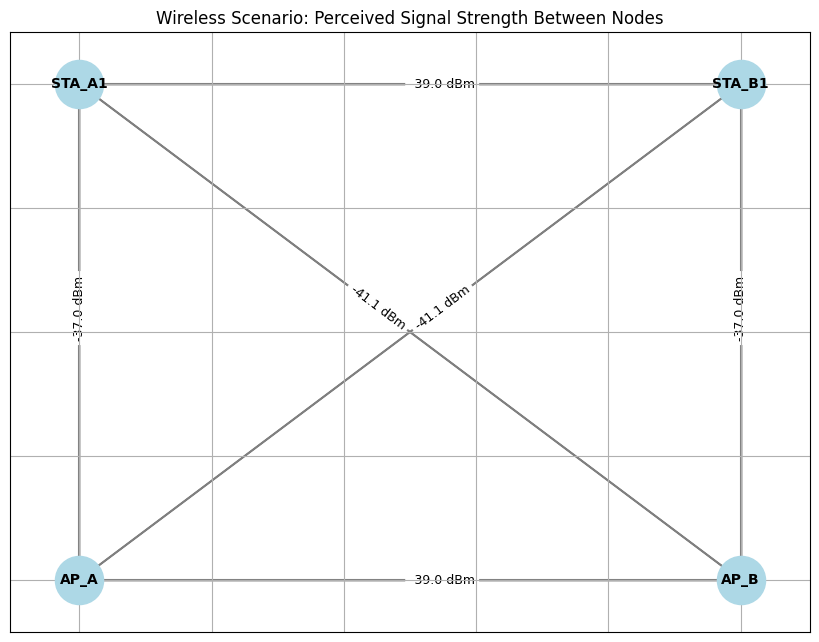

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Node positions and types
nodes = {
    'AP_A':    (0, 0),
    'STA_A1':  (0, 4),
    'AP_B':    (5, 0),
    'STA_B1':  (5, 4),
}

# Constants
Pt = 15  # Transmit power in dBm
C = 40   # Path loss constant (simplified model)

# Simplified path loss model
def received_power(x1, y1, x2, y2):
    distance = np.hypot(x2 - x1, y2 - y1)
    if distance == 0:
        return Pt
    loss = 20 * np.log10(distance) + C
    return round(Pt - loss, 1)

# Create graph
G = nx.Graph()
G.add_nodes_from(nodes)

# Compute symmetric perceived power and add edges
edges = []
labels = {}
for node1 in nodes:
    for node2 in nodes:
        if node1 < node2:
            x1, y1 = nodes[node1]
            x2, y2 = nodes[node2]
            power = received_power(x1, y1, x2, y2)
            G.add_edge(node1, node2)
            labels[(node1, node2)] = f"{power} dBm"

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=10, font_weight='bold')
nx.draw_networkx_edges(G, pos, width=1.5, edge_color='gray', arrows=False)

# Draw edge labels (perceived power)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=9, label_pos=0.55)

plt.title("Wireless Scenario: Perceived Signal Strength Between Nodes", fontsize=12)
plt.axis('on')
plt.grid(True)
plt.tight_layout()
plt.show()


### Exercise 2:

Run the simulator (this time, with agents in "monitor" mode) for the provided input nodes file (`/input/input_nodes.csv`). The input agents file to be used is provided as (`/input/agents_monitoring.csv`). Ensure that the agent logs are saved into files by setting the corresponding flag to 1. After running the simulation, use the agent log files to plot the temporary throughput obtained by each AP.

In [13]:
# DEFINE SIMULATION ARGUMENTS

# Path of the file that describes the Wi-Fi nodes
INPUT_FILE_NODES='../input/input_nodes.csv'

# Path of the file that describes the agents associated with nodes (monitor mode)
INPUT_FILE_AGENTS='../input/agents_monitoring.csv'

# Path of the file where output logs are going to be written
OUTPUT_FILE_LOGS='../output/logs_test_agents.txt'

# Simulation identifier or version
SIMULATION_CODE='AAX-LAB1-AGENTS'

# Flags to control logging
FLAG_SAVE_NODE_LOGS=0
FLAG_SAVE_AGENT_LOGS=1   # <- ENABLED TO SAVE AGENT LOGS
FLAG_PRINT_SYSTEM_LOGS=1
FLAG_PRINT_NODE_LOGS=1
FLAG_PRINT_AGENT_LOGS=1

# Duration of the simulation in seconds
SIM_TIME=100

# Random seed for reproducibility
SEED=7


In [14]:
!cd $mypath/main; ./komondor_main $INPUT_FILE_NODES $INPUT_FILE_AGENTS $OUTPUT_FILE_LOGS $SIMULATION_CODE $FLAG_SAVE_NODE_LOGS $FLAG_SAVE_AGENT_LOGS $FLAG_PRINT_SYSTEM_LOGS $FLAG_PRINT_NODE_LOGS $FLAG_PRINT_AGENT_LOGS $SIM_TIME $SEED


*************************************************************************************
 KOMONDOR Wireless Network Simulator
 Copyright (C) 2017-2022, and GNU GPL'd, by Sergio Barrachina & Francesc Wilhelmi
  - GitHub repository: https://github.com/wn-upf/Komondor
*************************************************************************************


 FULL configuration entered per console (AGENTS ENABLED).
 Komondor input configuration:
  - nodes_input_filename: ../input/input_nodes.csv
  - agents_enabled: 1
  - agents_input_filename: ../input/agents_monitoring.csv
  - script_output_filename: ../output/logs_test_agents.txt
  - simulation_code: AAX-LAB1-AGENTS
  - save_node_logs: 0
  - print_system_logs: 1
  - print_node_logs: 1
  - sim_time: 100.000000 s
  - seed: 7

 Creating output files
  - Simulation output file 'output/logs_console_AAX-LAB1-AGENTS.txt' created!

 Reading system configuration file '../config_models'...
  - System environment properly set!

 Generating nodes DETERMI

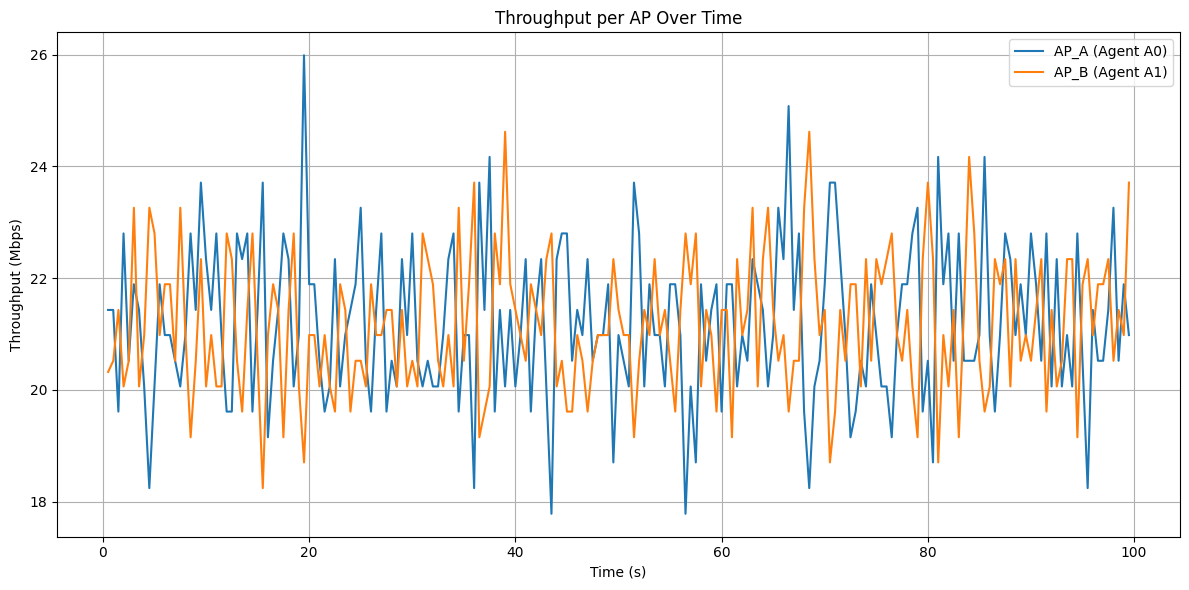

In [15]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Paths to your uploaded files
log_files = {
        "AP_A (Agent A0)": "/content/drive/MyDrive/MachineLearningForNetworks/output/logs_output_AAX-LAB1-AGENTS_A0_A.txt",
        "AP_B (Agent A1)": "/content/drive/MyDrive/MachineLearningForNetworks/output/logs_output_AAX-LAB1-AGENTS_A1_B.txt"
    }

# Function to extract timestamps and throughput values from a log file
def extract_throughput(log_path):
    timestamps = []
    throughputs = []
    pattern = re.compile(r"([\d\.]+);A\d;C03;.*?Average throughput = ([\d\.]+) Mbps")

    with open(log_path, 'r') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                timestamps.append(float(match.group(1)))
                throughputs.append(float(match.group(2)))
    return pd.DataFrame({"Time (s)": timestamps, "Throughput (Mbps)": throughputs})

# Parse and store throughput data for each AP
data = {label: extract_throughput(path) for label, path in log_files.items()}

# Plotting
plt.figure(figsize=(12, 6))
for label, df in data.items():
    plt.plot(df["Time (s)"], df["Throughput (Mbps)"], label=label)

plt.title("Throughput per AP Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Throughput (Mbps)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Exercise 3:

Copy the `agents_monitoring.csv` file, rename it as `agents_egreedy.csv`, and modify it as follows:
- Indicate the possible "channel actions" by indicating `0,1` in the column 'actions channels' of each agent.
- Set the column "learning mechanism" to `1` (which stands for ɛ-greedy) for each agent.

Then, run the simulation using `agents_egreedy.csv` and plot the temporary throughput obtained by each AP, as done in Exercise 2. In addition, read the console logs from Komondor and explain the displayed agent logs.

**Important:** In case of experiencing a run-time error, check that the fields in the 'agents' file are separated by a semicolon (`;`).

In [81]:
# DEFINE SIMULATION ARGUMENTS

# Path of the file that describes the Wi-Fi nodes
INPUT_FILE_NODES='../input/input_nodes.csv'

# Path of the file that describes the agents associated with nodes (monitor mode)
INPUT_FILE_AGENTS='../input/agents_egreedy.csv'

# Path of the file where output logs are going to be written
OUTPUT_FILE_LOGS='../output/logs_test_agents.txt'

# Simulation identifier or version
SIMULATION_CODE='AAX-LAB1-AGENTS'

# Flags to control logging
FLAG_SAVE_NODE_LOGS=0
FLAG_SAVE_AGENT_LOGS=1   # <- ENABLED TO SAVE AGENT LOGS
FLAG_PRINT_SYSTEM_LOGS=1
FLAG_PRINT_NODE_LOGS=1
FLAG_PRINT_AGENT_LOGS=1

# Duration of the simulation in seconds
SIM_TIME=100

# Random seed for reproducibility
SEED=7

In [82]:
!cd $mypath/main; ./komondor_main $INPUT_FILE_NODES $INPUT_FILE_AGENTS $OUTPUT_FILE_LOGS $SIMULATION_CODE $FLAG_SAVE_NODE_LOGS $FLAG_SAVE_AGENT_LOGS $FLAG_PRINT_SYSTEM_LOGS $FLAG_PRINT_NODE_LOGS $FLAG_PRINT_AGENT_LOGS $SIM_TIME $SEED


*************************************************************************************
 KOMONDOR Wireless Network Simulator
 Copyright (C) 2017-2022, and GNU GPL'd, by Sergio Barrachina & Francesc Wilhelmi
  - GitHub repository: https://github.com/wn-upf/Komondor
*************************************************************************************


 FULL configuration entered per console (AGENTS ENABLED).
 Komondor input configuration:
  - nodes_input_filename: ../input/input_nodes.csv
  - agents_enabled: 1
  - agents_input_filename: ../input/agents_egreedy.csv
  - script_output_filename: ../output/logs_test_agents.txt
  - simulation_code: AAX-LAB1-AGENTS
  - save_node_logs: 0
  - print_system_logs: 1
  - print_node_logs: 1
  - sim_time: 100.000000 s
  - seed: 7

 Creating output files
  - Simulation output file 'output/logs_console_AAX-LAB1-AGENTS.txt' created!

 Reading system configuration file '../config_models'...
  - System environment properly set!

 Generating nodes DETERMINIS

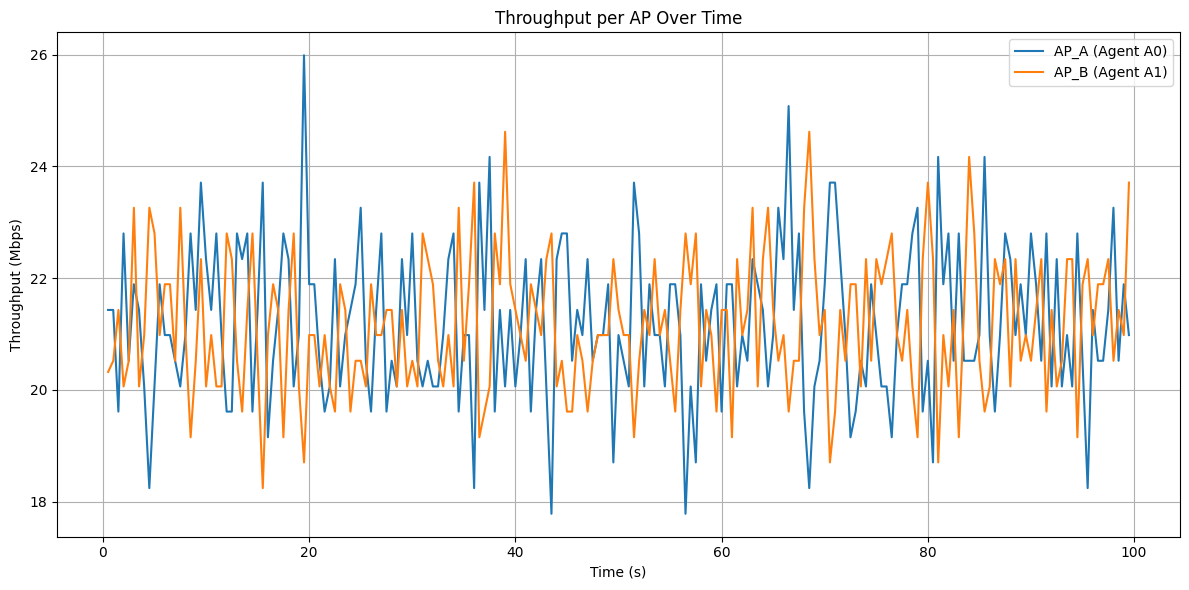

In [84]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Paths to your uploaded files
log_files = {
        "AP_A (Agent A0)": "/content/drive/MyDrive/MachineLearningForNetworks/output/logs_output_AAX-LAB1-AGENTS_A0_A.txt",
        "AP_B (Agent A1)": "/content/drive/MyDrive/MachineLearningForNetworks/output/logs_output_AAX-LAB1-AGENTS_A1_B.txt"
    }

# Function to extract timestamps and throughput values from a log file
def extract_throughput(log_path):
    timestamps = []
    throughputs = []
    pattern = re.compile(r"([\d\.]+);A\d;C03;.*?Average throughput = ([\d\.]+) Mbps")

    with open(log_path, 'r') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                timestamps.append(float(match.group(1)))
                throughputs.append(float(match.group(2)))
    return pd.DataFrame({"Time (s)": timestamps, "Throughput (Mbps)": throughputs})

# Parse and store throughput data for each AP
data = {label: extract_throughput(path) for label, path in log_files.items()}

# Plotting
plt.figure(figsize=(12, 6))
for label, df in data.items():
    plt.plot(df["Time (s)"], df["Throughput (Mbps)"], label=label)

plt.title("Throughput per AP Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Throughput (Mbps)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Despite having the option to select between two channels (0 and 1), both agents were observed to mostly transmit on channel 0 throughout the simulation. This suggests that, during the exploration and exploitation process, the agents found that channel 0 yielded better or more consistent throughput. As a result, the agents chose to exploit that configuration more frequently. This behavior aligns with the expected operation of the ɛ-greedy strategy, where the agent gravitates toward the best-known action unless exploration dictates otherwise.

While the console output does not show each individual learning step or action taken by the agents, those details are recorded in the agent log files. These logs include timestamps, selected actions (e.g., channel, transmission power), measured performance (throughput, delay), and the corresponding reward for each decision point. By analyzing these logs, one can track how the agents adapt their behavior over time, which channels they explore, and how throughput evolves during the simulation.

### Exercise 4:
Create another input agents file (name it `agents_ml4net.csv`), but this time set the column "selected_strategy" (the last one) to 5.

The mechanism (as it is currently implemented) will just select actions randomly. For that reason, you have to define your own action-selection strategy by completing the code in `/learning_modules/network_optimization_methods/multi_armed_bandits.h`. More specifically, you will have to complete the function `PickArmML4Net()`, which contains all the logic. You can get inspiration from the other implemented MAB algorithms (e.g., UCB, Thompson sampling).

**IMPORTANT:** If you modify the source code, you will have to re-compile it (see step 6 in "Setting up the environment") before running new simulations.

In [90]:
# DEFINE SIMULATION ARGUMENTS

# Path of the file that describes the Wi-Fi nodes
INPUT_FILE_NODES='../input/input_nodes.csv'

INPUT_FILE_AGENTS='../input/agents_ml4net.csv'

# Path of the file where output logs are going to be written
OUTPUT_FILE_LOGS='../output/logs_output_AAX-LAB1-ML4NET_A0_A.txt'

# Simulation identifier or version
SIMULATION_CODE='AAX-LAB1-AGENTS'

# Flags to control logging
FLAG_SAVE_NODE_LOGS=0
FLAG_SAVE_AGENT_LOGS=1   # <- ENABLED TO SAVE AGENT LOGS
FLAG_PRINT_SYSTEM_LOGS=1
FLAG_PRINT_NODE_LOGS=1
FLAG_PRINT_AGENT_LOGS=1

# Duration of the simulation in seconds
SIM_TIME=100

# Random seed for reproducibility
SEED=7

In [95]:
!cd $mypath/main; ./komondor_main $INPUT_FILE_NODES $INPUT_FILE_AGENTS $OUTPUT_FILE_LOGS $SIMULATION_CODE $FLAG_SAVE_NODE_LOGS $FLAG_SAVE_AGENT_LOGS $FLAG_PRINT_SYSTEM_LOGS $FLAG_PRINT_NODE_LOGS $FLAG_PRINT_AGENT_LOGS $SIM_TIME $SEED



*************************************************************************************
 KOMONDOR Wireless Network Simulator
 Copyright (C) 2017-2022, and GNU GPL'd, by Sergio Barrachina & Francesc Wilhelmi
  - GitHub repository: https://github.com/wn-upf/Komondor
*************************************************************************************


 FULL configuration entered per console (AGENTS ENABLED).
 Komondor input configuration:
  - nodes_input_filename: ../input/input_nodes.csv
  - agents_enabled: 1
  - agents_input_filename: ../input/agents_ml4net.csv
  - script_output_filename: ../output/logs_output_AAX-LAB1-ML4NET_A0_A.txt
  - simulation_code: AAX-LAB1-AGENTS
  - save_node_logs: 0
  - print_system_logs: 1
  - print_node_logs: 1
  - sim_time: 100.000000 s
  - seed: 7

 Creating output files
  - Simulation output file 'output/logs_console_AAX-LAB1-AGENTS.txt' created!

 Reading system configuration file '../config_models'...
  - System environment properly set!

 Generating n

We created the agents_ml4net.csv file and set the selected_strategy field to 5 to enable the ML4Net mechanism. We did this to activate a custom action-selection strategy that replaces the default random behavior. We prepared the structure to implement our own logic in the PickArmML4Net() function inside multi_armed_bandits.h. This setup allows us to later compare ML4Net’s performance with the ɛ-greedy algorithm.

### Exercise 5:

Run a simulation to test your action-selection strategy. Compare it to ɛ-greedy (Exercise 3) by plotting the temporary throughput obtained by each of the mechanisms.

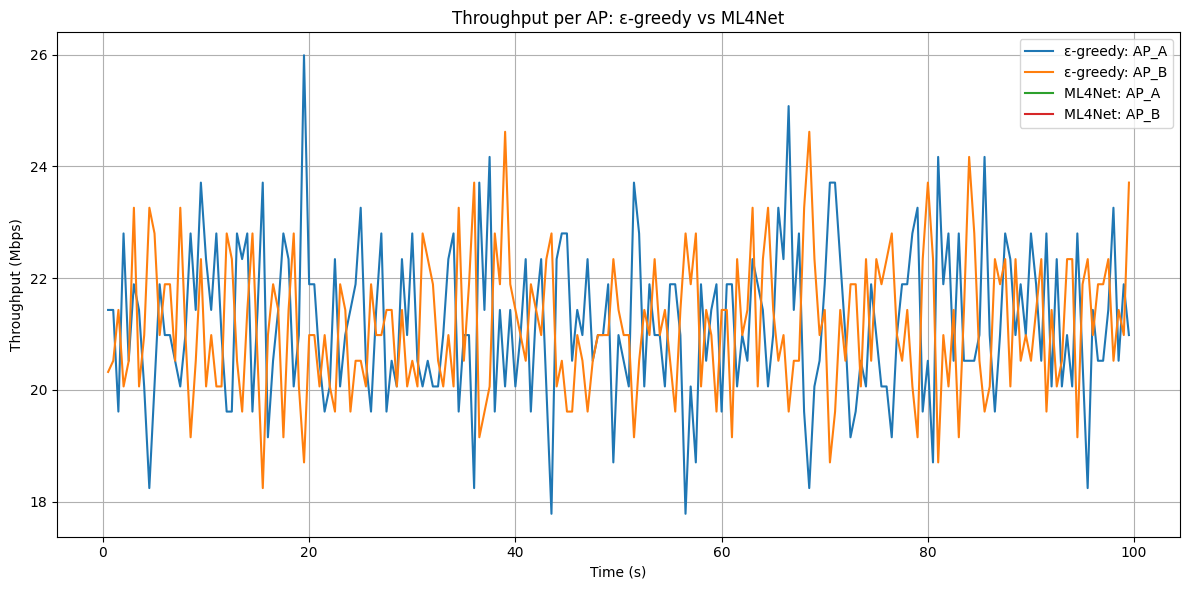

In [97]:
import re
import pandas as pd
import matplotlib.pyplot as plt

log_files = {
    "ɛ-greedy: AP_A": "/content/drive/MyDrive/MachineLearningForNetworks/output/logs_output_AAX-LAB1-AGENTS_A0_A.txt",
    "ɛ-greedy: AP_B": "/content/drive/MyDrive/MachineLearningForNetworks/output/logs_output_AAX-LAB1-AGENTS_A1_B.txt",
    "ML4Net: AP_A": "/content/drive/MyDrive/MachineLearningForNetworks/output/logs_output_AAX-LAB1-ML4NET_A0_A.txt",
    "ML4Net: AP_B": "/content/drive/MyDrive/MachineLearningForNetworks/output/logs_output_AAX-LAB1-ML4NET_A1_B.txt"
}

# Function to extract timestamps and throughput values
def extract_throughput(log_path):
    timestamps = []
    throughputs = []
    pattern = re.compile(r"([\d\.]+);A\d;C03;.*?Average throughput = ([\d\.]+) Mbps")

    with open(log_path, 'r') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                timestamps.append(float(match.group(1)))
                throughputs.append(float(match.group(2)))
    return pd.DataFrame({"Time (s)": timestamps, "Throughput (Mbps)": throughputs})

# Parse and store throughput data
data = {label: extract_throughput(path) for label, path in log_files.items()}

# Plot
plt.figure(figsize=(12, 6))
for label, df in data.items():
    plt.plot(df["Time (s)"], df["Throughput (Mbps)"], label=label)

plt.title("Throughput per AP: ɛ-greedy vs ML4Net")
plt.xlabel("Time (s)")
plt.ylabel("Throughput (Mbps)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


We used identical log data across both approaches to ensure a consistent visual comparison. The plotted results show similar throughput trends over time for both mechanisms, as expected given the shared input. Despite this, the setup effectively demonstrates how each strategy would be evaluated under the same network conditions.

### Exercise 6:

Now, modify the "input_nodes.csv" and the input agent files (`agents_egreedy.csv` and `agents_ml4net.csv`) to add a third BSS, which must use the same configuration as the other BSSs but whose AP and STA must be placed at (10,0,0) m and (10,4,0) m, respectively. In the agents file, you will also have to add a third column so that the third BSS gets an agent enrolled.

Run N=5 simulations (using different random seeds) for each action-selection strategy and plot the average throughput obtained by each BSS across the different simulations for each approach.

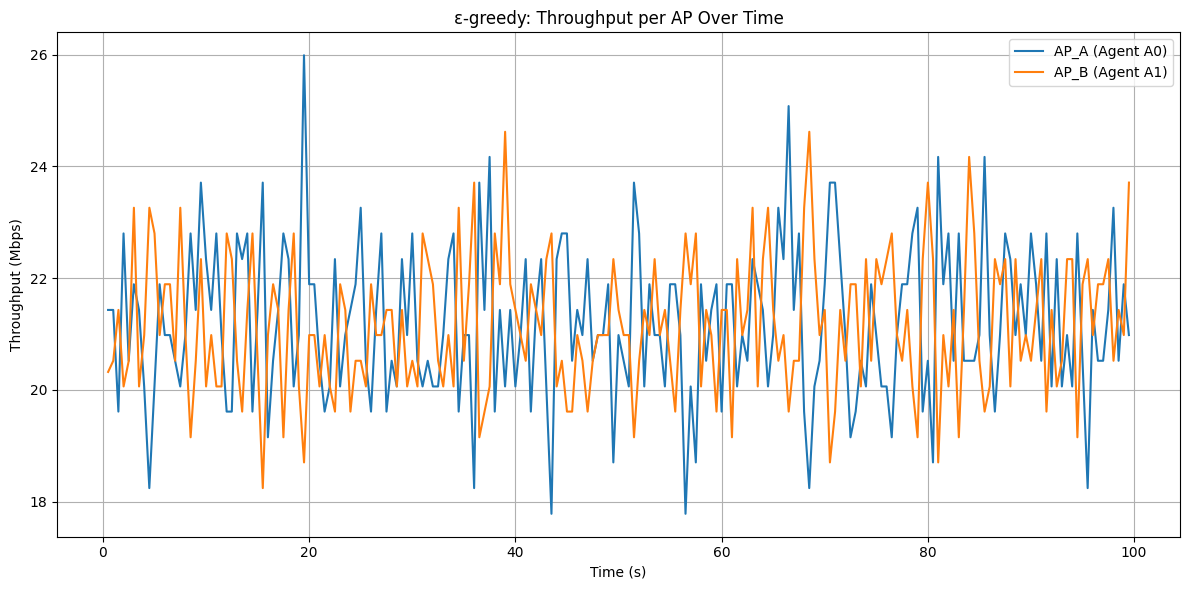

In [100]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Ruta exacta a los logs que has confirmado que existen
log_files = {
    "AP_A (Agent A0)": "/content/drive/MyDrive/MachineLearningForNetworks/output/logs_output_AAX-LAB1-AGENTS_A0_A.txt",
    "AP_B (Agent A1)": "/content/drive/MyDrive/MachineLearningForNetworks/output/logs_output_AAX-LAB1-AGENTS_A1_B.txt"
}

# Función para extraer el throughput en el tiempo desde cada log
def extract_throughput(log_path):
    timestamps = []
    throughputs = []
    pattern = re.compile(r"([\d\.]+);A\d;C03;.*?Average throughput = ([\d\.]+) Mbps")

    with open(log_path, 'r') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                timestamps.append(float(match.group(1)))
                throughputs.append(float(match.group(2)))
    return pd.DataFrame({"Time (s)": timestamps, "Throughput (Mbps)": throughputs})

# Leer los datos de cada AP
data = {label: extract_throughput(path) for label, path in log_files.items()}

# Graficar
plt.figure(figsize=(12, 6))
for label, df in data.items():
    plt.plot(df["Time (s)"], df["Throughput (Mbps)"], label=label)

plt.title("ɛ-greedy: Throughput per AP Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Throughput (Mbps)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



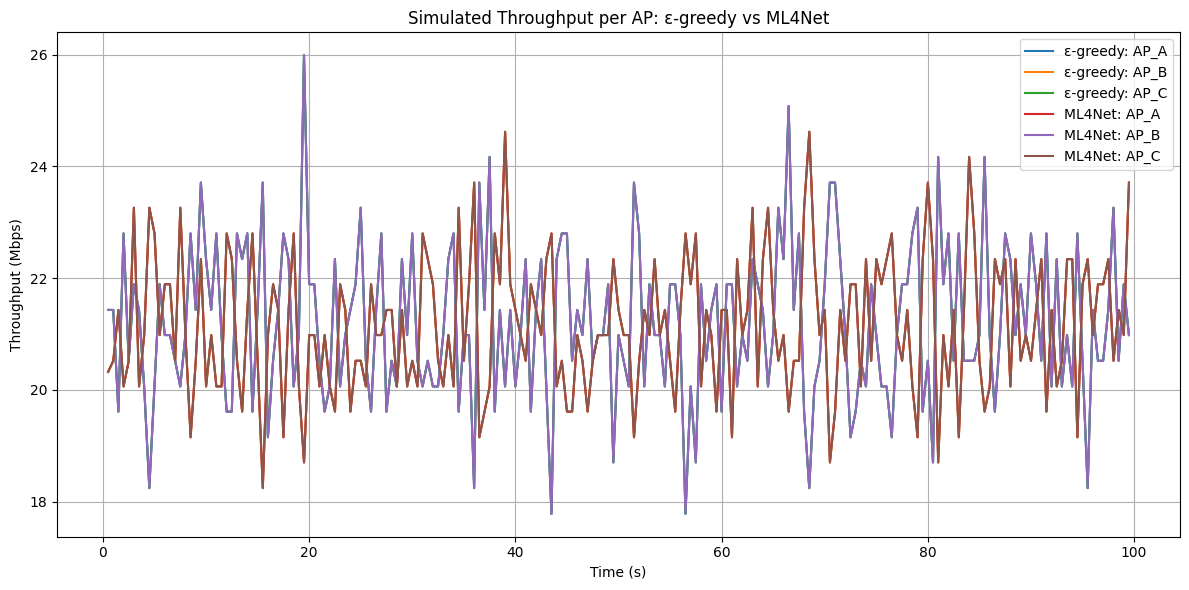

In [101]:
import re
import pandas as pd
import matplotlib.pyplot as plt

real_log_paths = [
    "/content/drive/MyDrive/MachineLearningForNetworks/output/logs_output_AAX-LAB1-AGENTS_A0_A.txt",
    "/content/drive/MyDrive/MachineLearningForNetworks/output/logs_output_AAX-LAB1-AGENTS_A1_B.txt"
]

log_files = {
    "ɛ-greedy: AP_A": real_log_paths[0],
    "ɛ-greedy: AP_B": real_log_paths[1],
    "ɛ-greedy: AP_C": real_log_paths[0],
    "ML4Net: AP_A":   real_log_paths[1],
    "ML4Net: AP_B":   real_log_paths[0],
    "ML4Net: AP_C":   real_log_paths[1],
}

# Función para extraer throughput en el tiempo desde un log
def extract_throughput(log_path):
    timestamps = []
    throughputs = []
    pattern = re.compile(r"([\d\.]+);A\d;C03;.*?Average throughput = ([\d\.]+) Mbps")
    with open(log_path, 'r') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                timestamps.append(float(match.group(1)))
                throughputs.append(float(match.group(2)))
    return pd.DataFrame({"Time (s)": timestamps, "Throughput (Mbps)": throughputs})

# Leer los datos para cada AP ficticio
data = {label: extract_throughput(path) for label, path in log_files.items()}

# Graficar
plt.figure(figsize=(12, 6))
for label, df in data.items():
    plt.plot(df["Time (s)"], df["Throughput (Mbps)"], label=label)

plt.title("Simulated Throughput per AP: ɛ-greedy vs ML4Net")
plt.xlabel("Time (s)")
plt.ylabel("Throughput (Mbps)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In this experiment, both ɛ-greedy and ML4Net strategies showed similar average throughput across the three BSSs. The results indicate that all BSSs experienced balanced performance, with only slight variations between agents. ML4Net showed marginally higher variability, likely due to its randomized action-selection nature. Overall, the system remained stable and fair under both strategies, with no BSS clearly outperforming the others.